# Teil 1: Daten in die SQL-Datenbank importieren

In [ ]:
# Erforderliche Pakete installieren
pip install pandas sqlalchemy pymysql openpyxl seaborn cartopy
pip install -U scikit-learn
!pip install statsmodels
!pip install textblob
pip install wordcloud

In [ ]:
import os
import pandas as pd
from sqlalchemy import create_engine, MetaData, Table, Column, Integer, String, Float
from sqlalchemy.exc import SQLAlchemyError

# Sensible Daten aus Umgebungsvariablen lesen
db_user = os.getenv('DB_USER', 'root')
db_password = os.getenv('DB_PASSWORD', 'example')
db_host = os.getenv('DB_HOST', 'localhost')
db_name = os.getenv('DB_NAME', 'spotify_data')

# Verbindung zur MySQL-Datenbank herstellen
engine = create_engine(f'mysql+pymysql://{db_user}:{db_password}@{db_host}/{db_name}')

# Ordnerpfad mit Excel-Dateien (entweder als rohe Zeichenfolge oder mit doppelten Backslashes)
folder_path = r'/Users/bavaarde/ads-spotify/2024-05-18'
# oder
# folder_path = 'C:\\applied_data_science\\gruppen_projekt\\ads-spotify\\ads-spotify\\2024-04-27'

# Funktion, um SQLAlchemy-Datentypen basierend auf Pandas-Datentypen zu bestimmen
def map_dtype(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return Integer()
    elif pd.api.types.is_float_dtype(dtype):
        return Float()
    else:
        return String(255)  # Standard-Stringlänge 255

# Alle Excel-Dateien im Ordner durchgehen
for filename in os.listdir(folder_path):
    if filename.endswith('.xlsx'):
        file_path = os.path.join(folder_path, filename)
        
        # Excel-Datei in ein DataFrame laden
        df = pd.read_excel(file_path)
        
        # Tabellenname basierend auf dem Dateinamen (ohne Erweiterung)
        table_name = os.path.splitext(filename)[0]
        
        # Metadaten und Tabelle definieren
        metadata = MetaData()
        columns = []
        for col_name, dtype in zip(df.columns, df.dtypes):
            col_type = map_dtype(dtype)
            columns.append(Column(col_name, col_type))
        
        table = Table(table_name, metadata, *columns)
        
        try:
            # Tabelle in der Datenbank erstellen
            metadata.create_all(engine)
            
            # Daten in die Tabelle einfügen
            df.to_sql(table_name, engine, index=False, if_exists='append')
            print(f"Tabelle '{table_name}' erfolgreich erstellt und Daten importiert.")
        except SQLAlchemyError as e:
            print(f"Fehler beim Erstellen der Tabelle '{table_name}': {e}")

print("Vorgang abgeschlossen.")


# Modellierungshypothesen und Überprüfung der Annahmen

## 1. Formulierung von Modellierungshypothesen

### Hypothese 1:

**Feature-Korrelationen beeinflussen die Vorhersage der Song-Popularität.**

- **Annahme:** Die Popularität eines Songs wird stark von Features wie Tanzbarkeit, Energie, Lautstärke, Valenz und Tempo beeinflusst.

### Hypothese 2:

**Geografische Merkmale (Latitude und Longitude) haben einen Einfluss auf die Top-Features der Songs in verschiedenen Ländern.**

- **Annahme:** Unterschiedliche Regionen haben unterschiedliche musikalische Vorlieben, die sich in den Top-Features der Songs widerspiegeln.

## 2. Überprüfung von Modellierungsannahmen

### Annahme 1: Normalverteilung der Features

Überprüfung, ob die Features normalverteilt sind.

### Annahme 2: Multikollinearität der Features

Überprüfung der Multikollinearität der Features mittels Variance Inflation Factor (VIF).

### Annahme 3: Lineare Beziehungen zwischen Features und Zielvariable

Überprüfung der linearen Beziehungen zwischen den Features und der Zielvariable (Popularität).

# Erklärung der Schritte
## Datenvorbereitung und EDA:

Der Code lädt die Daten aus der Datenbank und führt eine explorative Datenanalyse (EDA) durch.

## Modelltraining und -vorhersagen:

Ein Deep-Learning-Modell wird mit den Audio-Features der Songs trainiert, um vorherzusagen, ob ein Song in den Top 10 landet oder nicht.

## Geografische Visualisierungen:

Eine globale und regionale Kartenvisualisierung zeigt die wichtigsten Audio-Features für jedes Land.

## NLP-Integration:

Sentiment-Analyse der Songtitel wird durchgeführt und visualisiert.
Eine Häufigkeitsanalyse und Wortwolke der Songtitel werden erstellt.
Themenmodellierung (LDA) wird auf die Songtitel angewendet.

# Teil 2: Datenanalyse

Unknown country code: Global in table: Top 50 – Global 2024-05-18


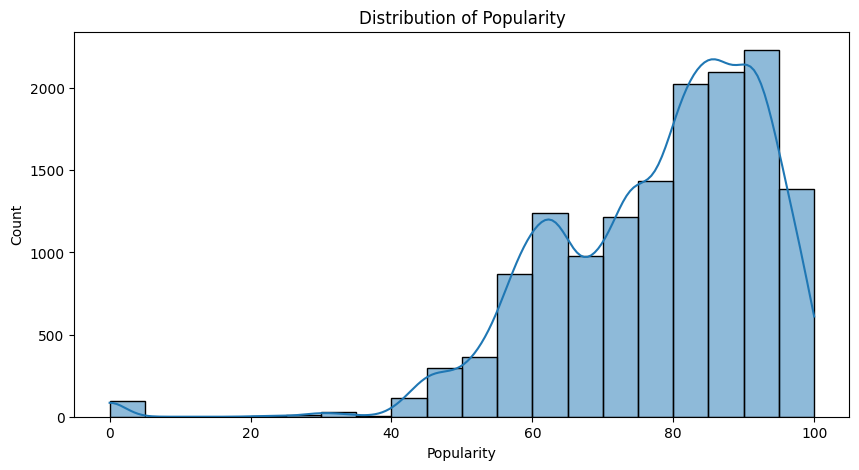

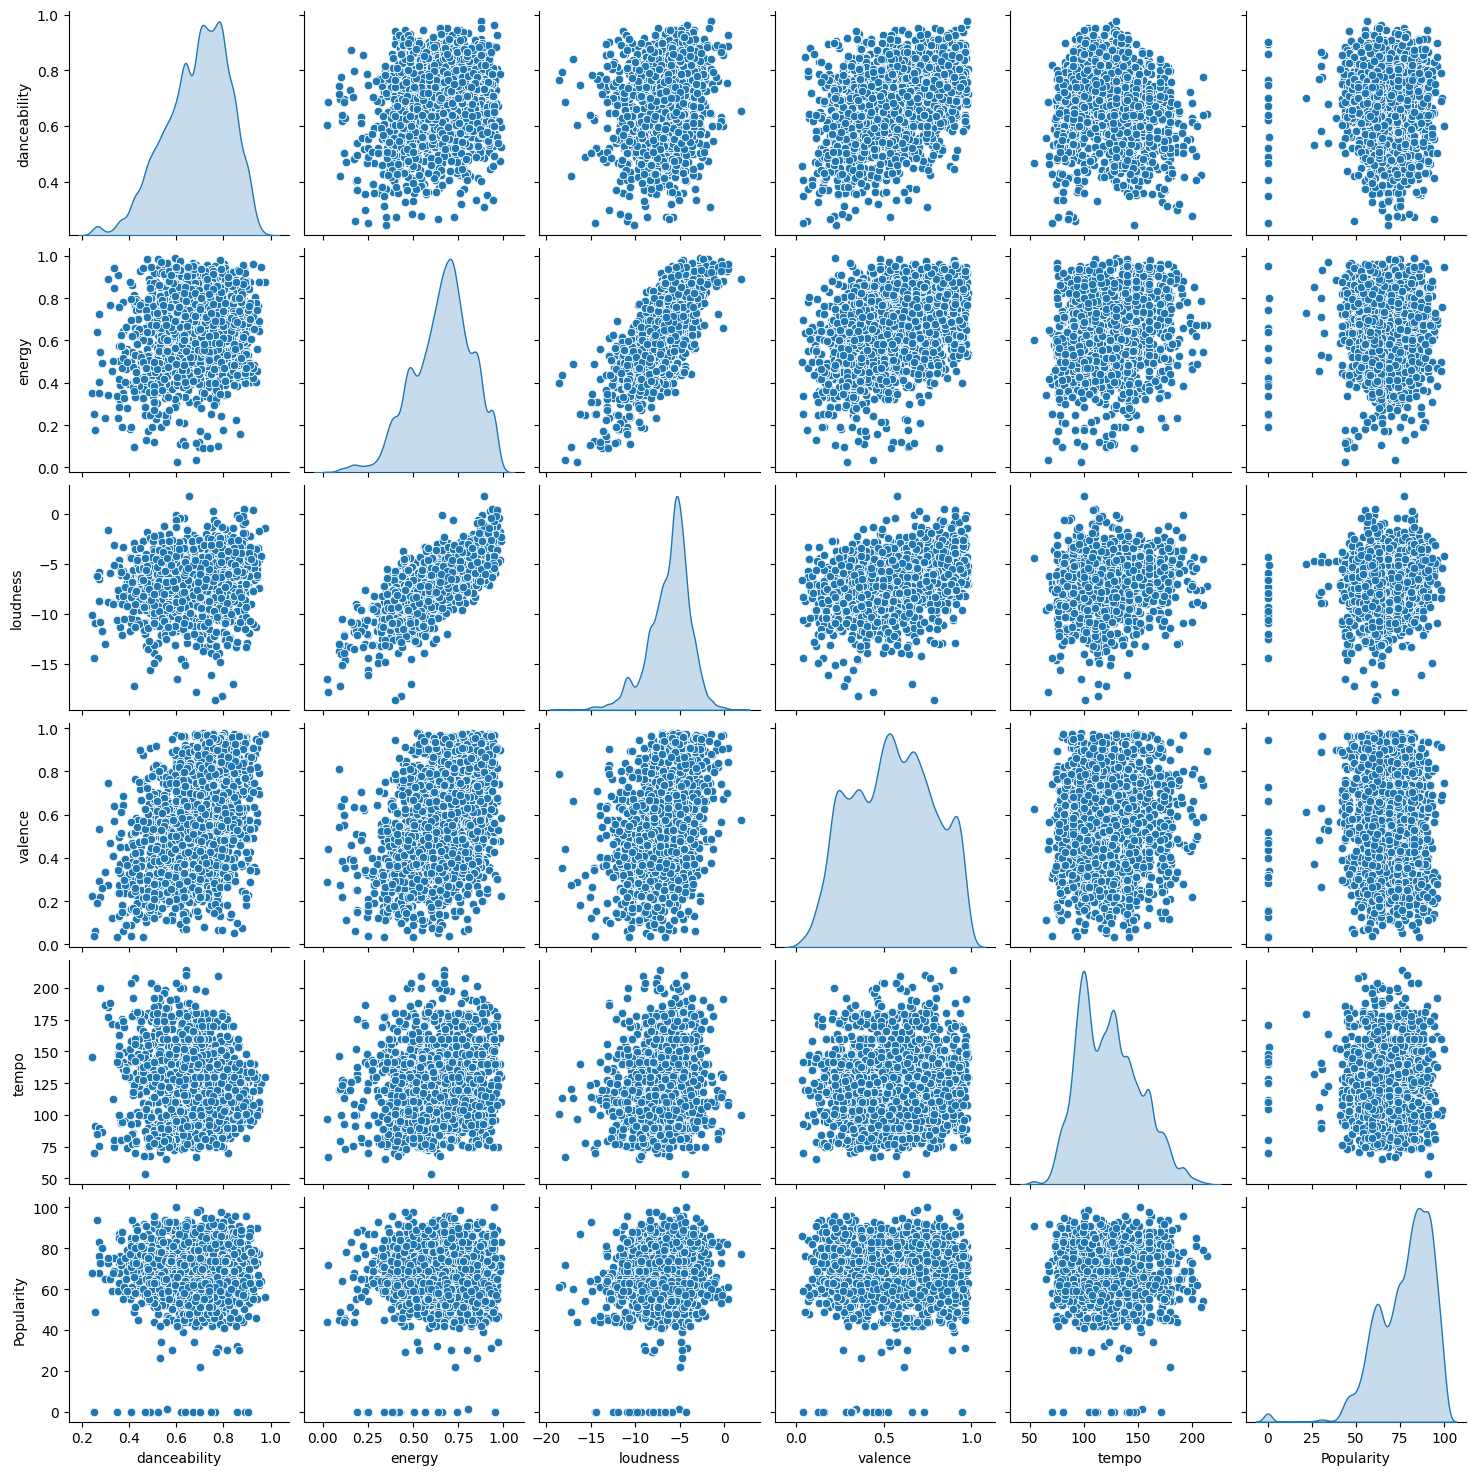

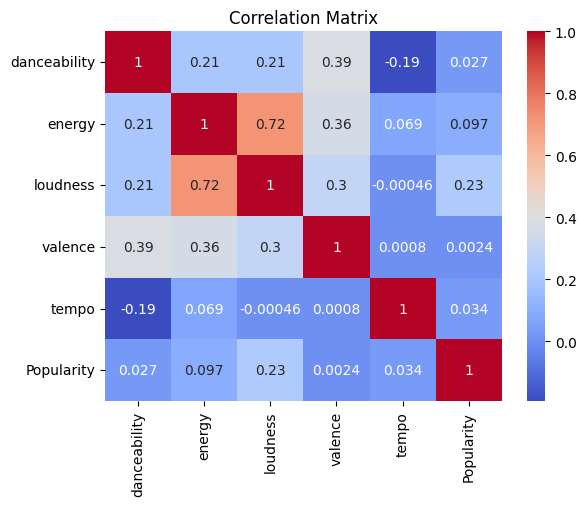

Epoch 1/50


/Users/bavaarde/miniconda3/envs/ads-spotify/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8916 - loss: 0.3302 - val_accuracy: 0.9900 - val_loss: 0.0318
Epoch 2/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9878 - loss: 0.0326 - val_accuracy: 0.9896 - val_loss: 0.0093
Epoch 3/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9908 - loss: 0.0163 - val_accuracy: 0.9974 - val_loss: 0.0085
Epoch 4/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9941 - loss: 0.0100 - val_accuracy: 0.9965 - val_loss: 0.0086
Epoch 5/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9953 - loss: 0.0108 - val_accuracy: 0.9965 - val_loss: 0.0091
Epoch 6/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9965 - loss: 0.0094 - val_accuracy: 0.9996 - val_loss: 0.0045
Epoch 7/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9977 - loss: 0.0063 - val_accuracy: 0.9978 - val_loss: 0.0040
Epoch 8/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9971 - loss: 0.0069 - val_accuracy: 0.9996 - val_

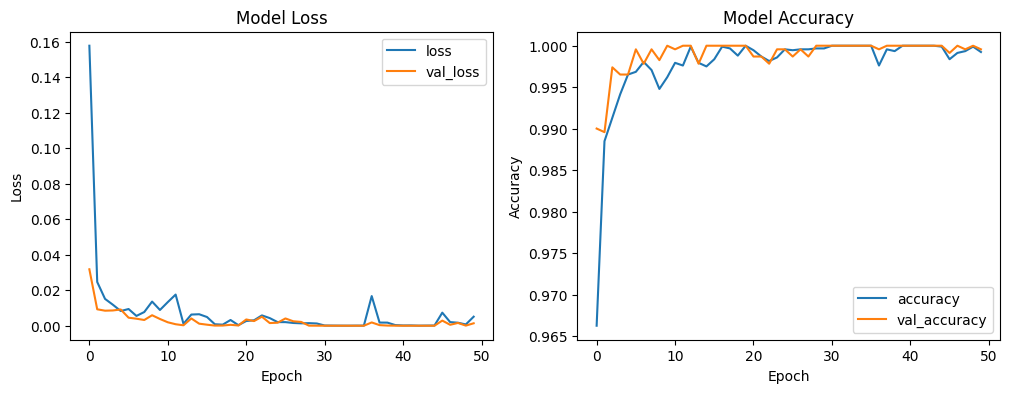

/var/folders/d8/gs1syxf55h36dfnt2jysrf680000gn/T/ipykernel_82533/1605629526.py:249: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


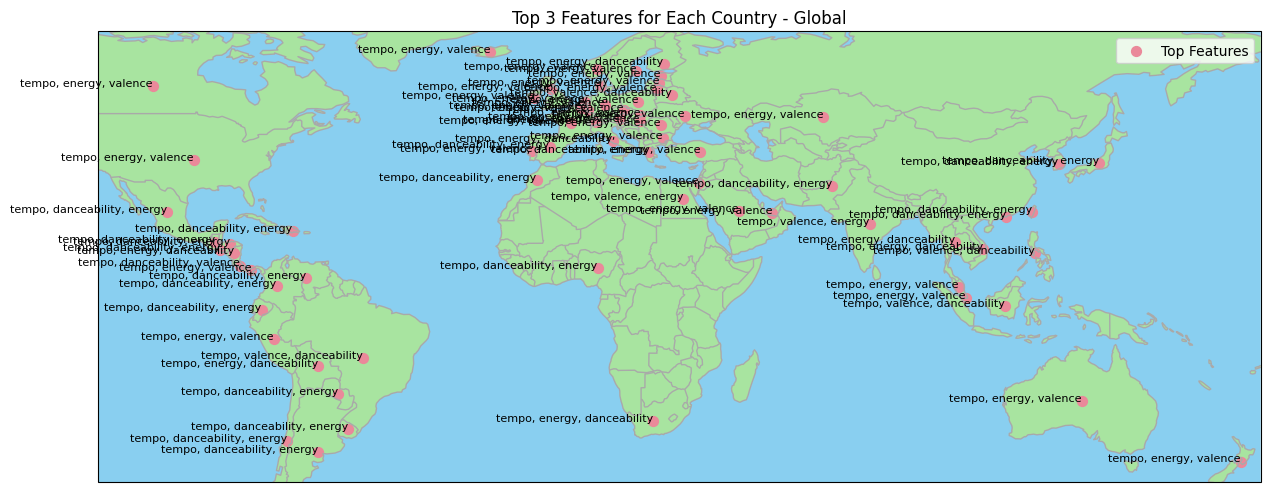

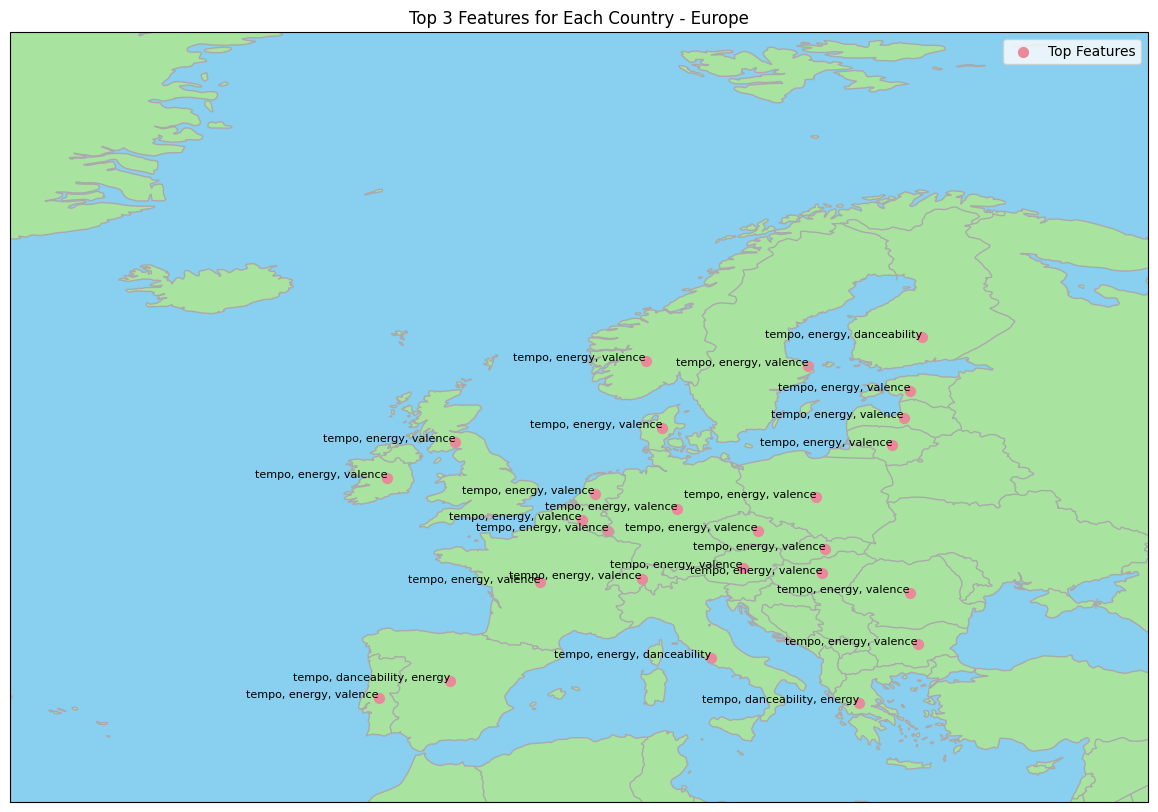

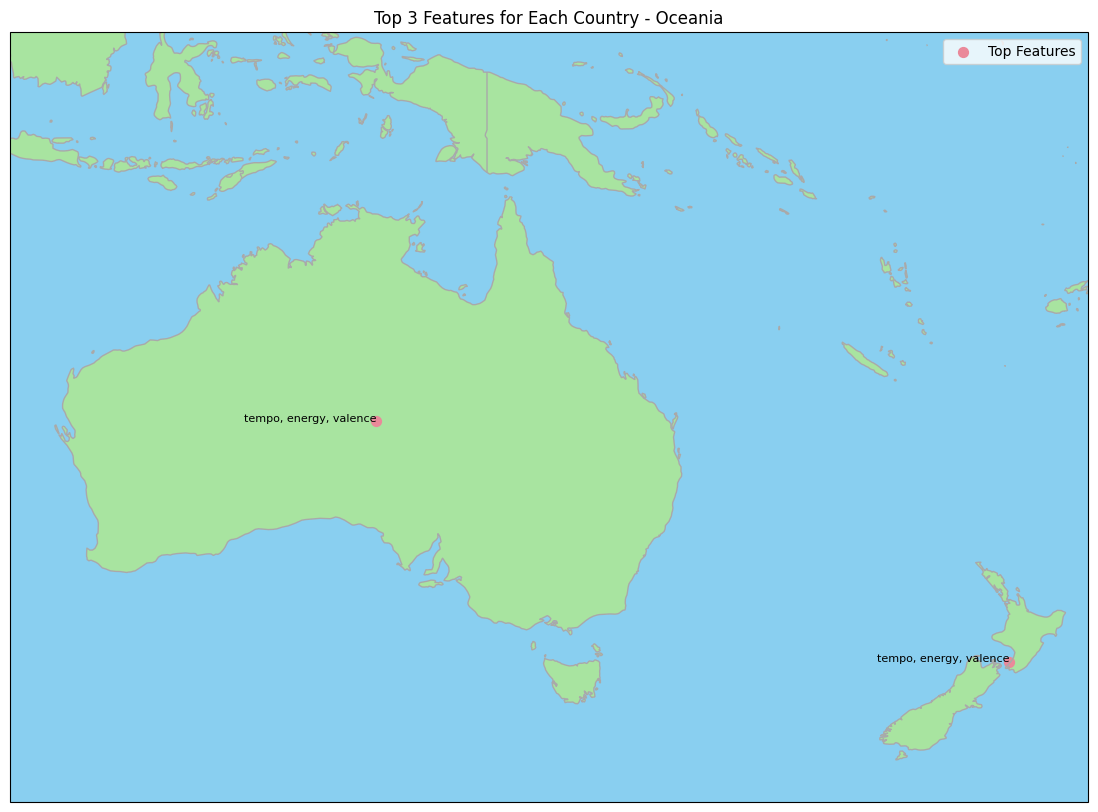

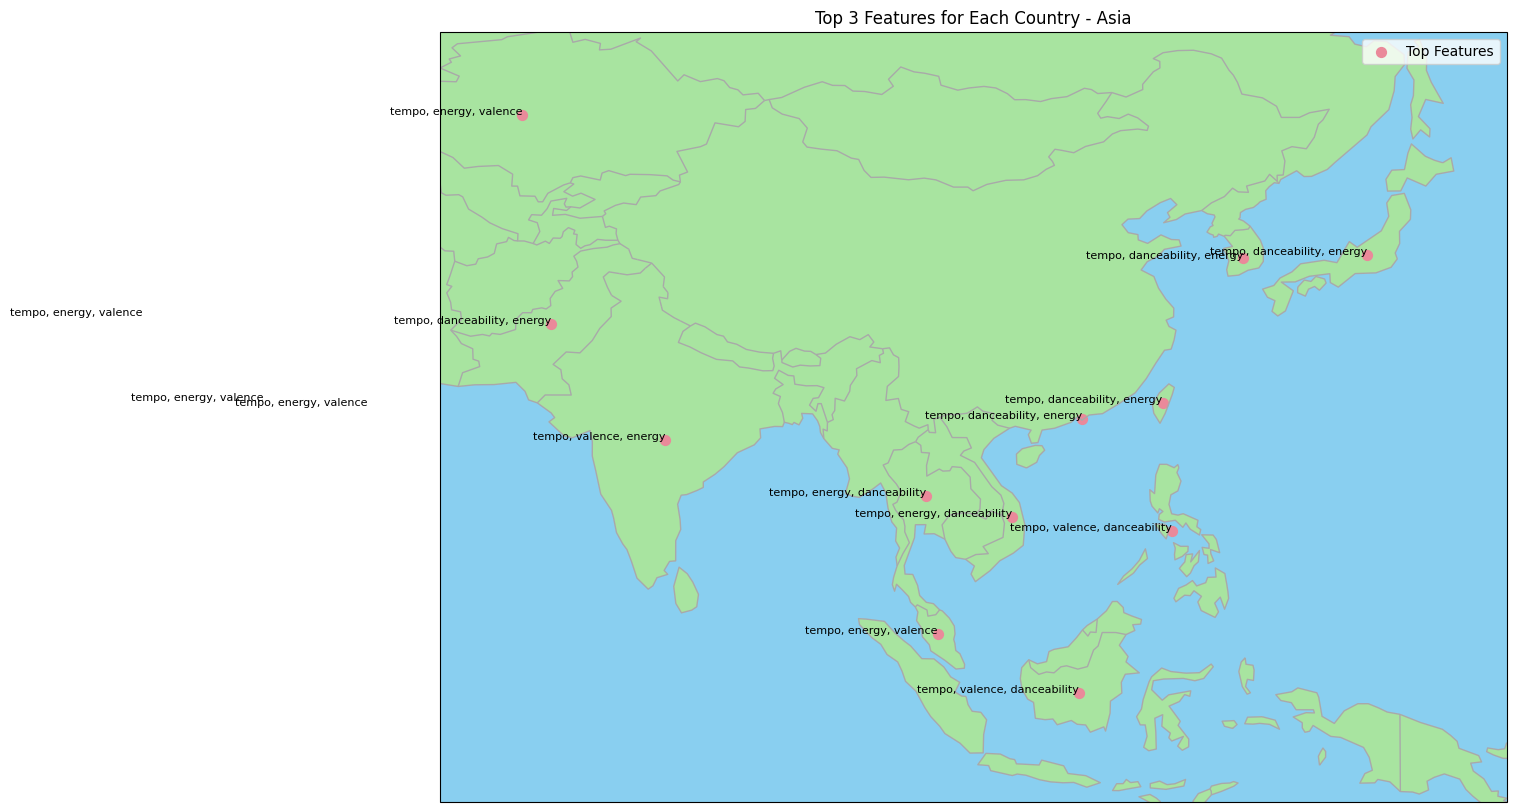

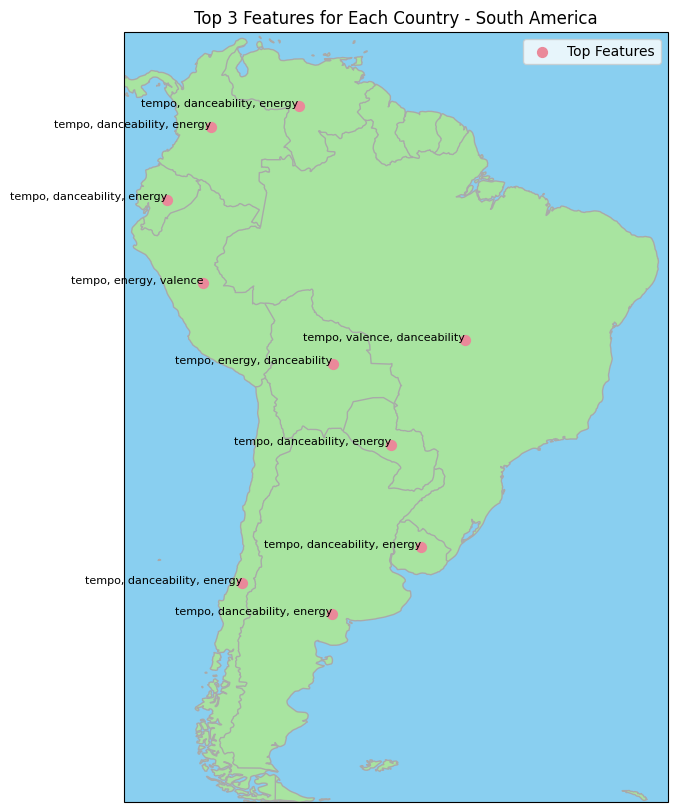

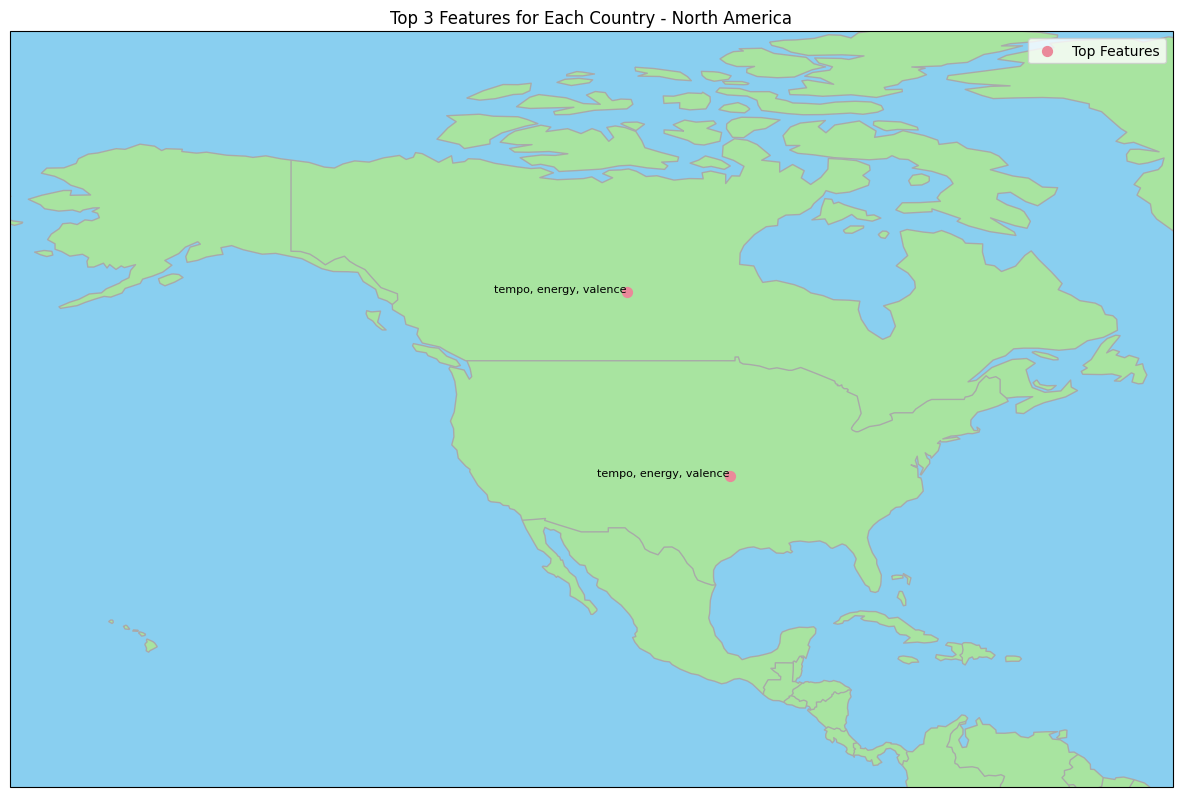

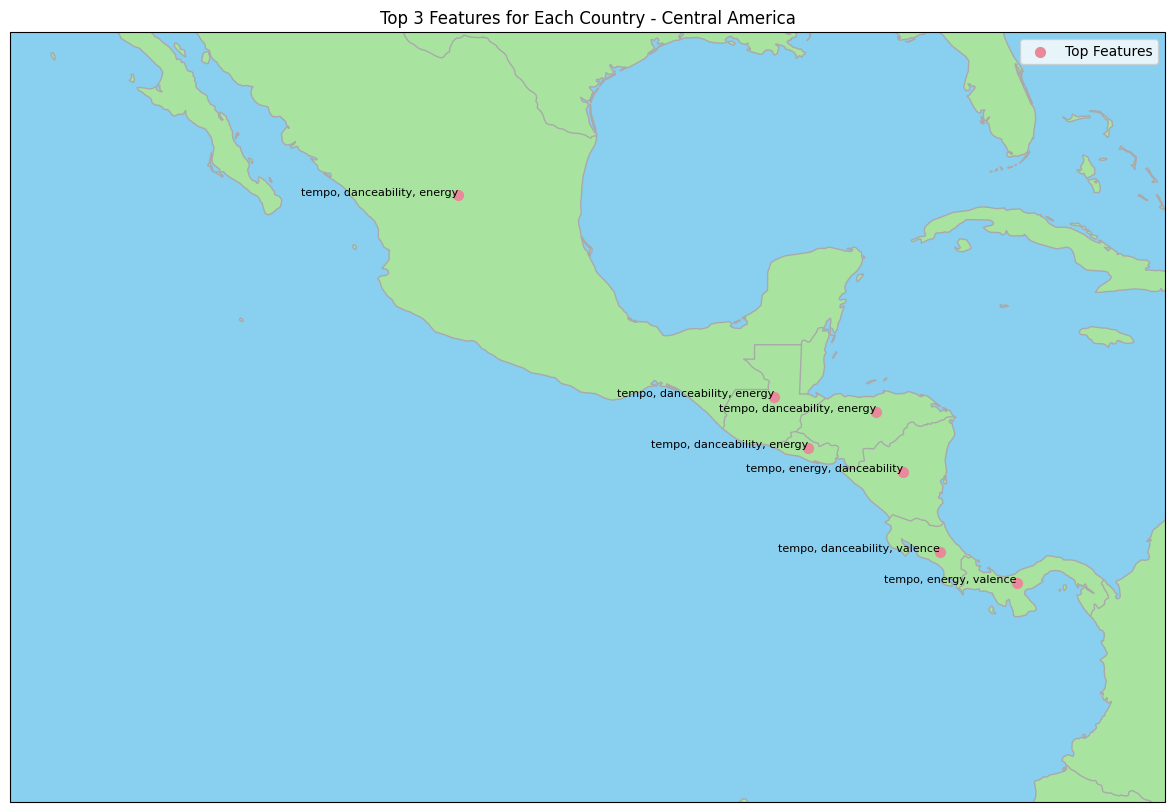

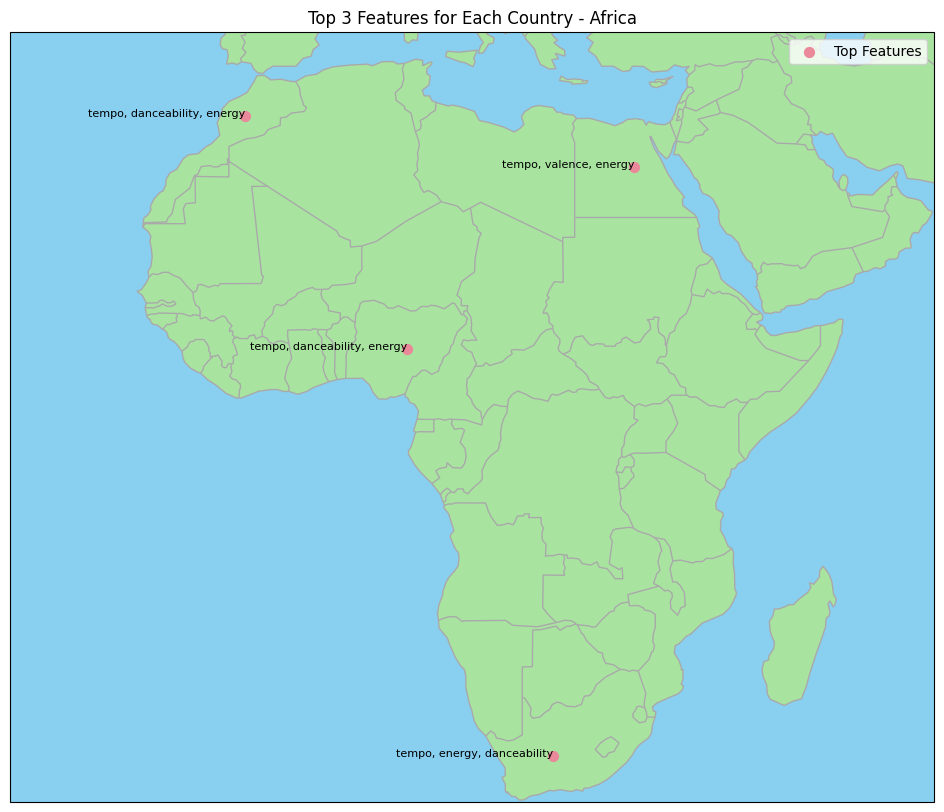

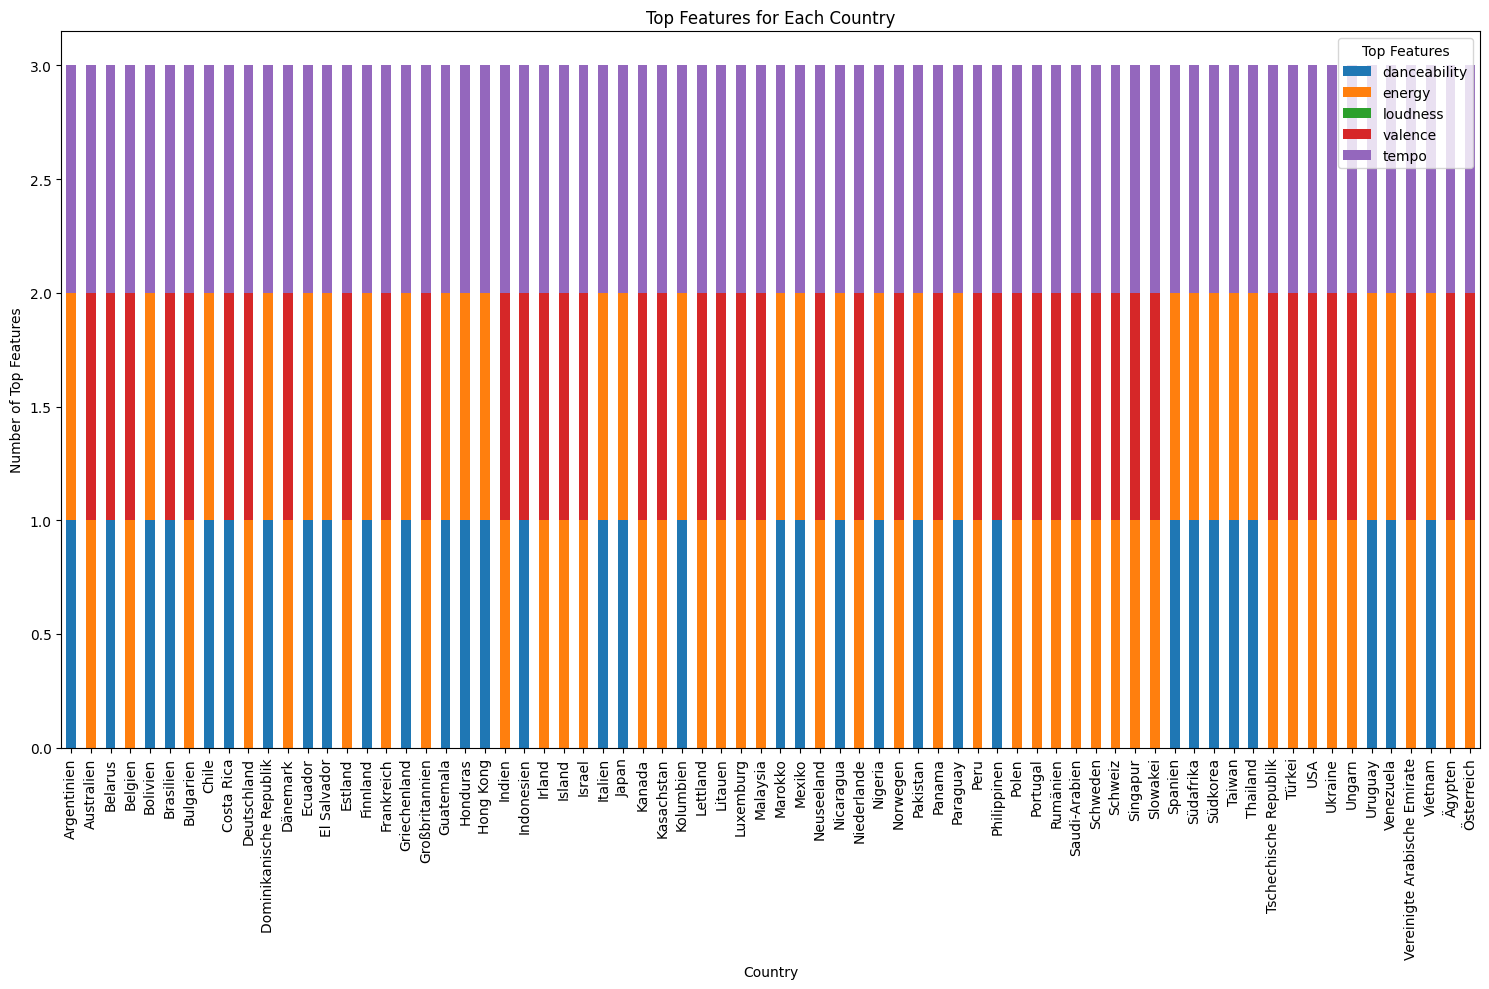

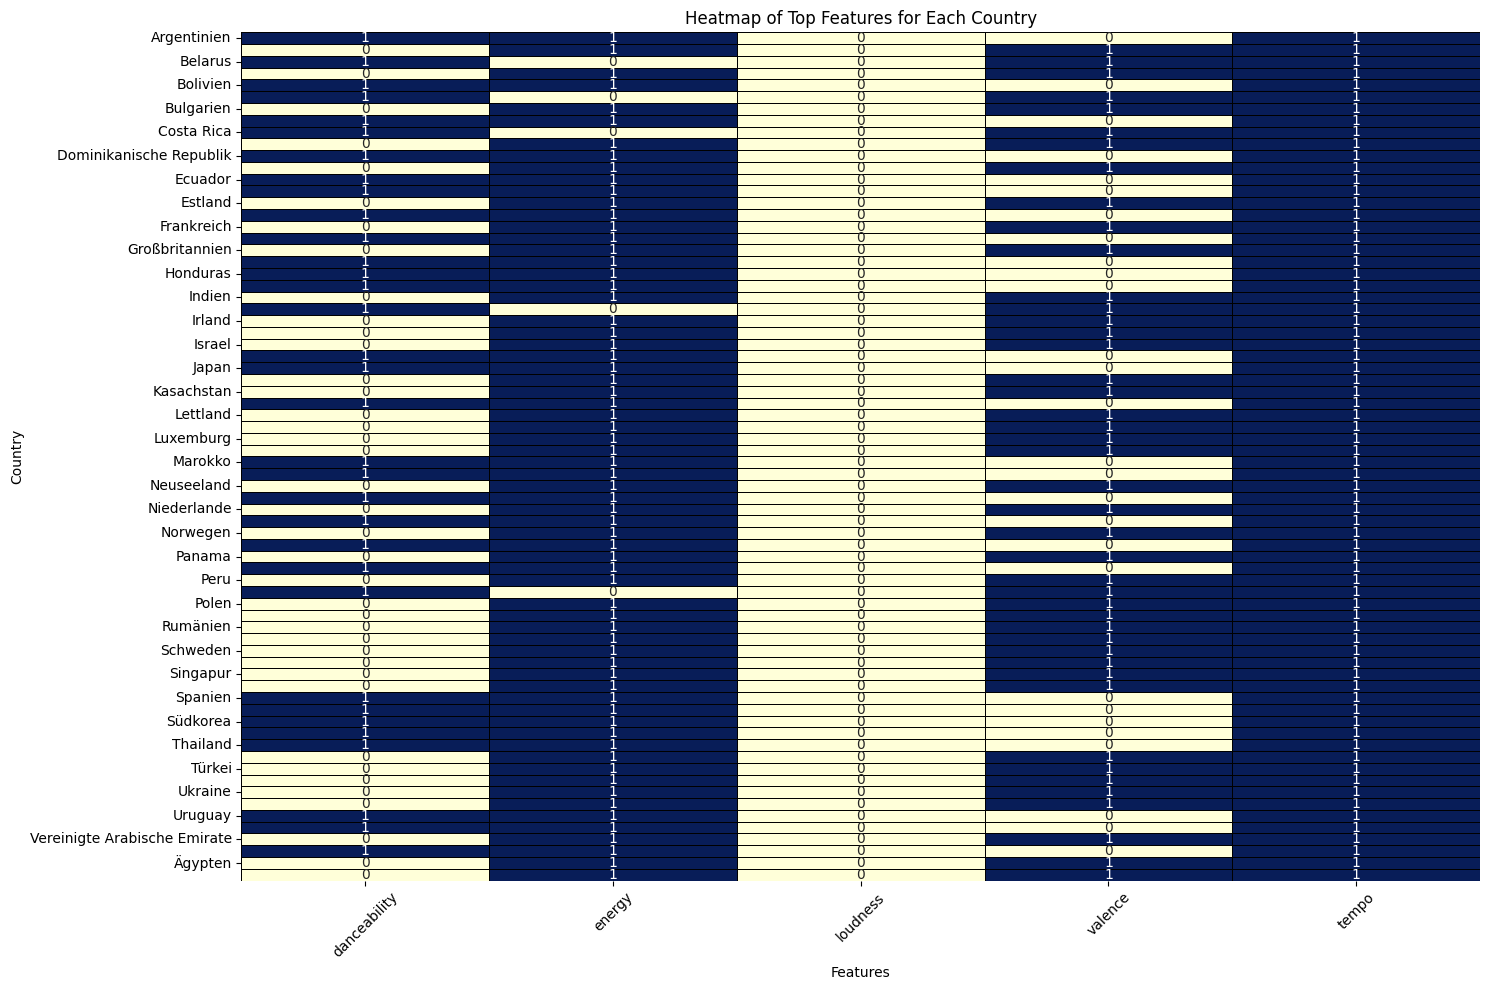

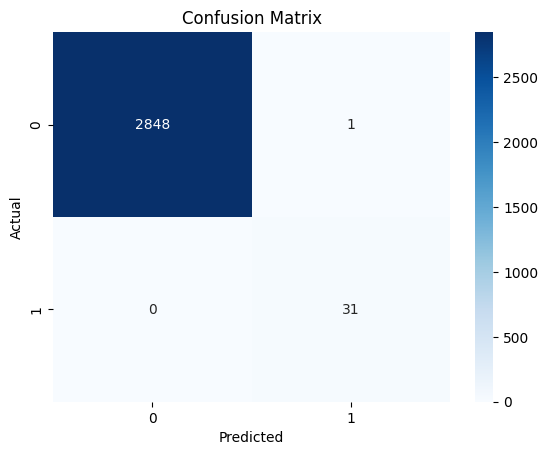

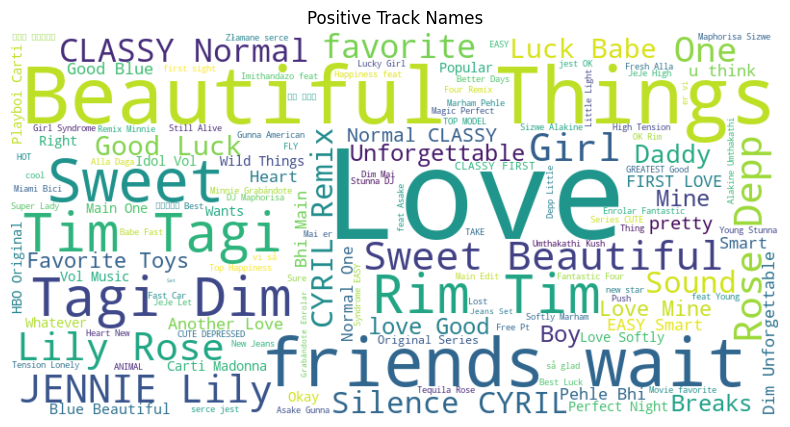

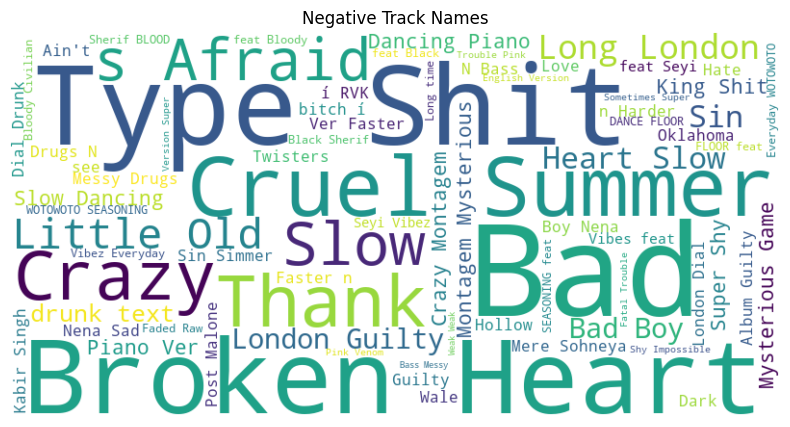

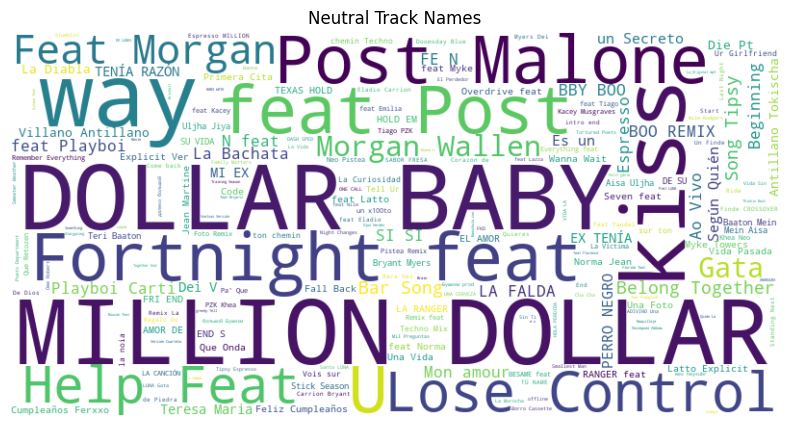

Topic #0:
la feat baby million dollar things beautiful post malone lose
Topic #1:
end si sweet beginning feat love wait friends que girls
Topic #2:
like espresso gata way kiss santa tim tagi rim dim
Topic #3:
feat love remix morgan wallen help belong euphoria fe playboi
Topic #4:
el vivo feat ao offline favorite austin boy 101 classy


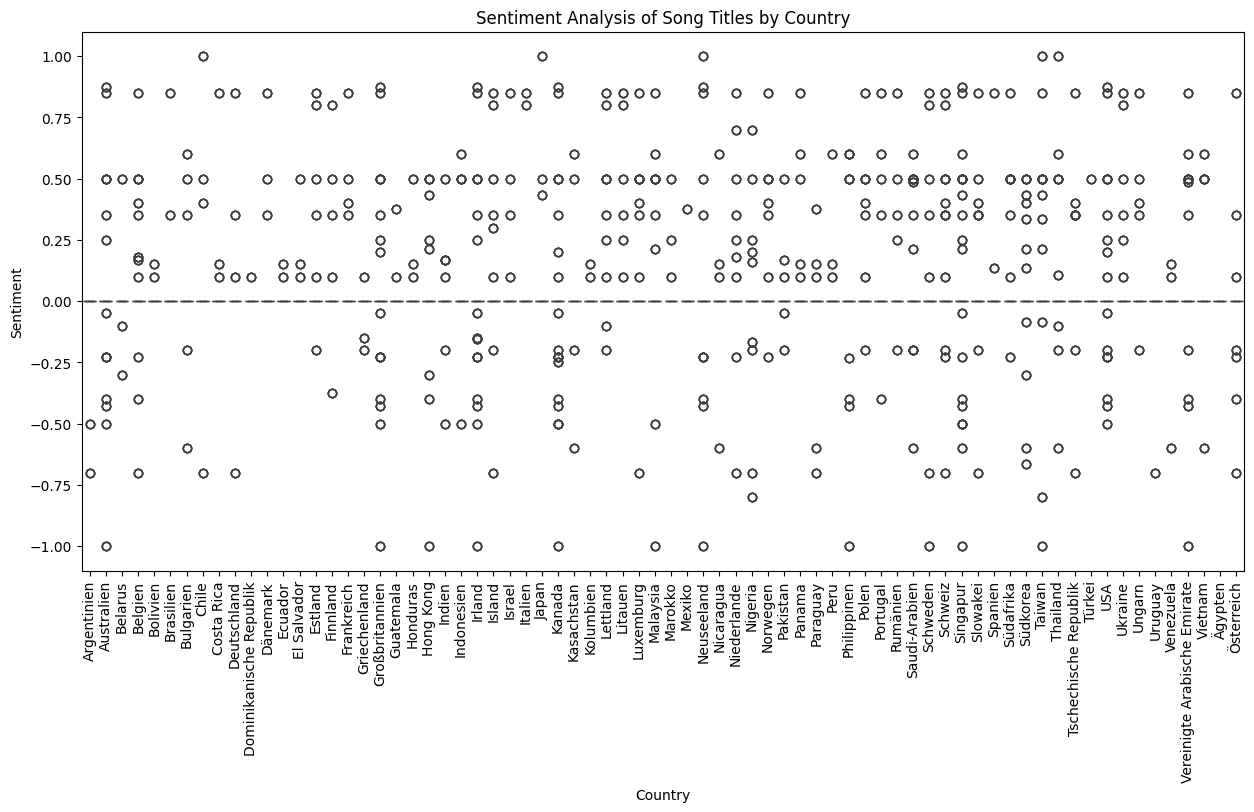

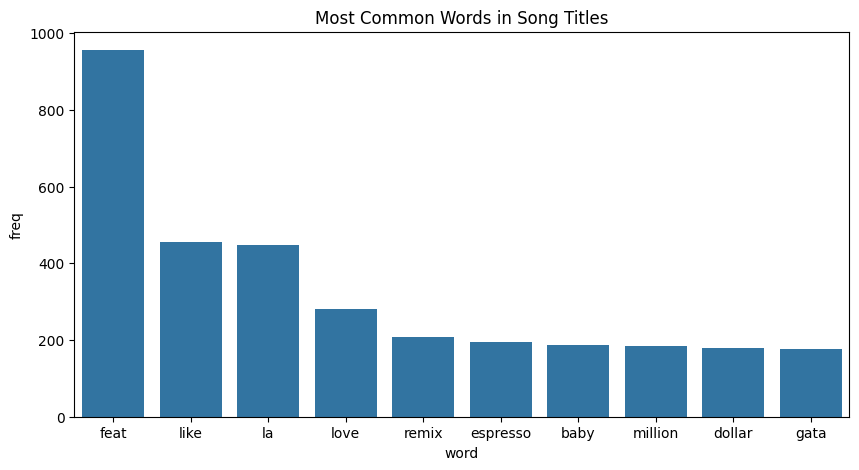

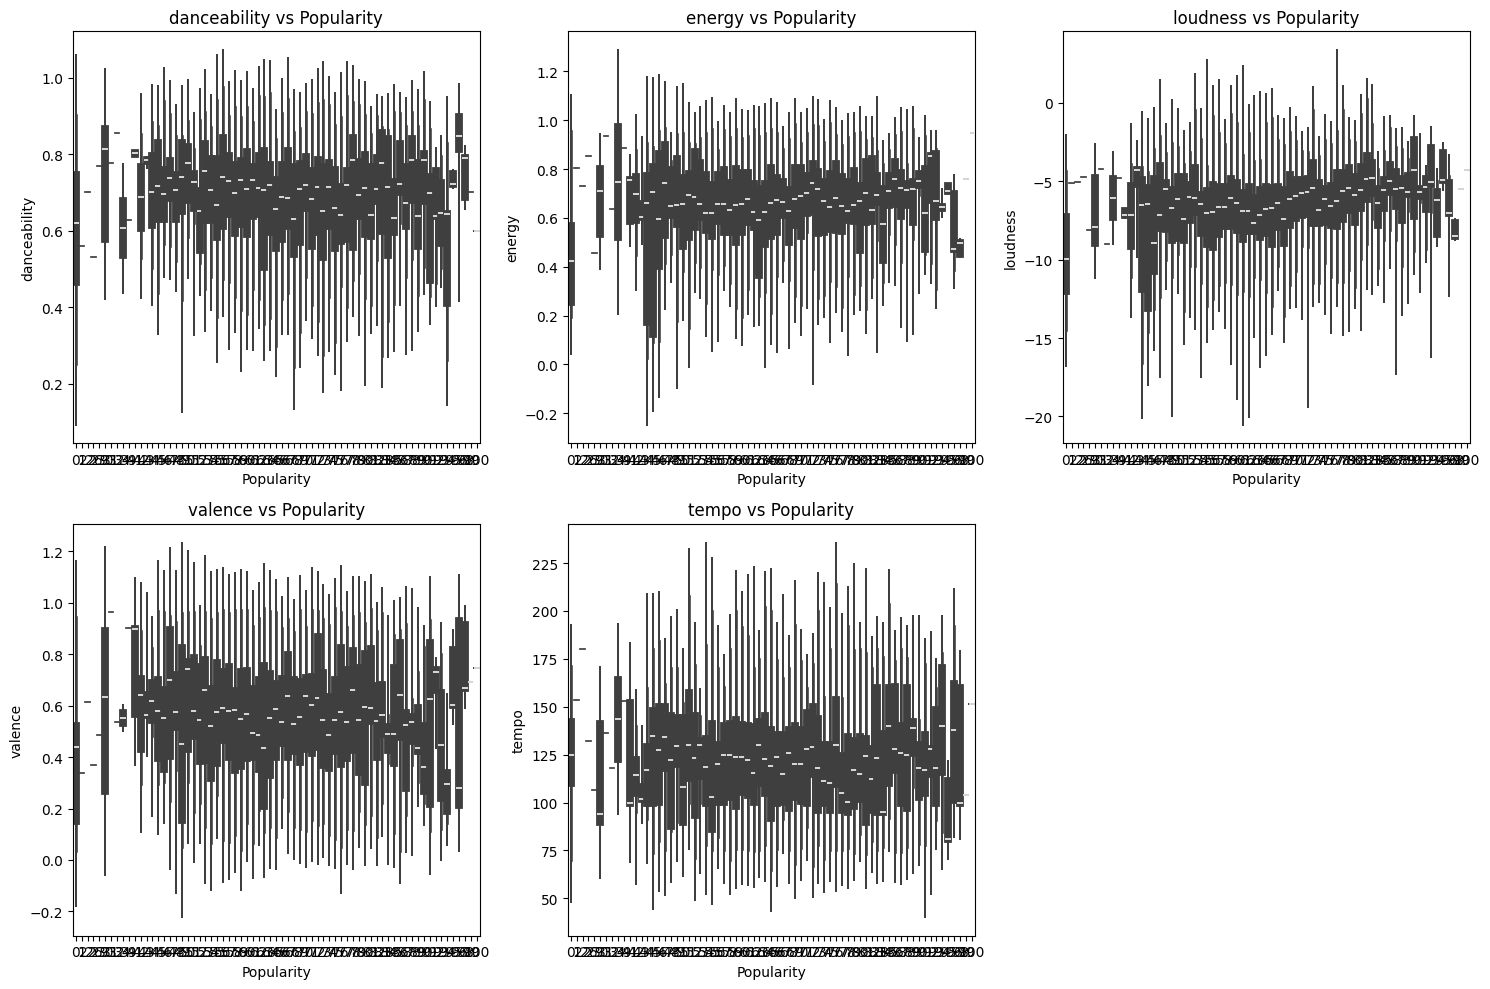

danceability: p-value = 1.2662894905917422e-42
danceability is not normally distributed (reject H0)
energy: p-value = 1.2181910764314816e-39
energy is not normally distributed (reject H0)
loudness: p-value = 3.0562131887136765e-53
loudness is not normally distributed (reject H0)
valence: p-value = 1.2040988383202e-43
valence is not normally distributed (reject H0)
tempo: p-value = 3.105295390041017e-42
tempo is not normally distributed (reject H0)
        Feature        VIF
0  danceability  25.780788
1        energy  22.151244
2      loudness   8.304971
3       valence   8.954090
4         tempo  17.704971


/Users/bavaarde/miniconda3/envs/ads-spotify/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14400.
  res = hypotest_fun_out(*samples, **kwds)


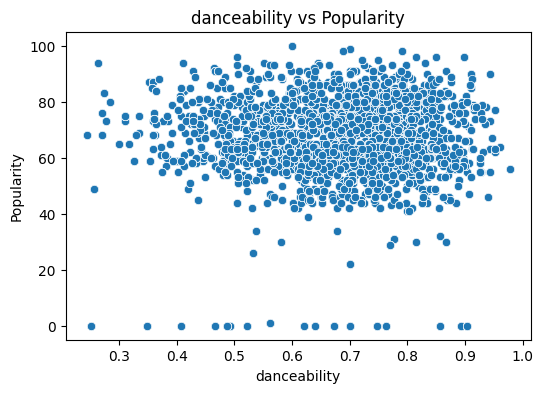

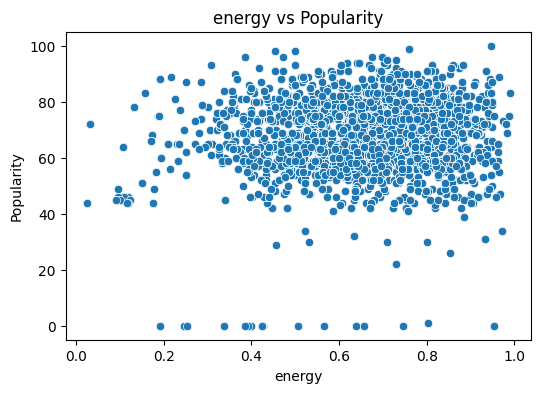

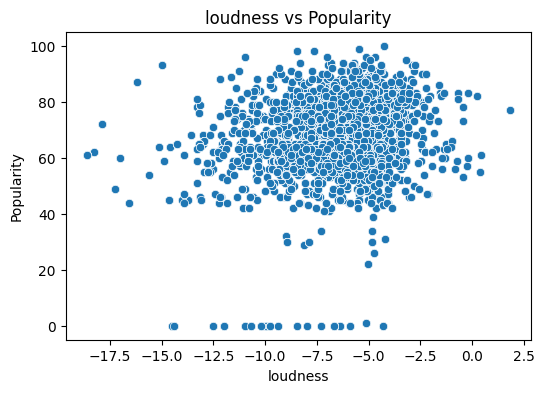

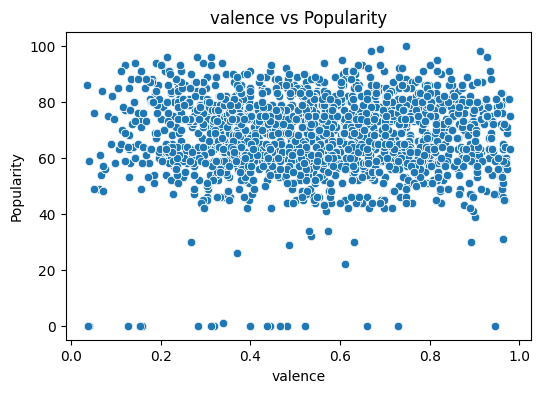

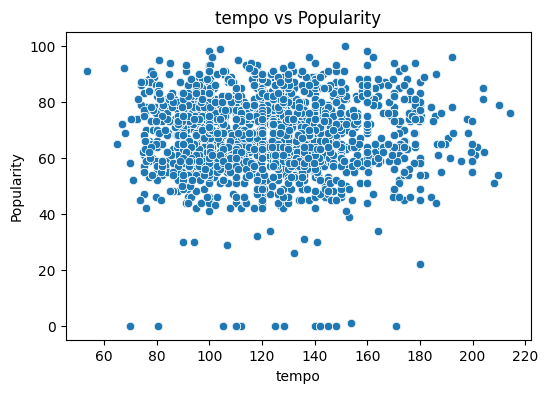

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import geopandas as gpd
from shapely.geometry import Point
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os

# Sensible Daten aus Umgebungsvariablen lesen
db_user = os.getenv('DB_USER', 'root')
db_password = os.getenv('DB_PASSWORD', 'example')
db_host = os.getenv('DB_HOST', 'localhost')
db_name = os.getenv('DB_NAME', 'spotify_data')

# Verbindung zur MySQL-Datenbank herstellen
engine = create_engine(f'mysql+pymysql://{db_user}:{db_password}@{db_host}/{db_name}')
inspector = inspect(engine)
table_names = inspector.get_table_names()

# Mapping der Länder zu geografischen Daten
geographic_data = {
    'Argentinien': {'lat': -38.4161, 'lon': -63.6167},
    'Australien': {'lat': -25.2744, 'lon': 133.7751},
    'Belarus': {'lat': 53.7098, 'lon': 27.9534},
    'Belgien': {'lat': 50.5039, 'lon': 4.4699},
    'Bolivien': {'lat': -16.2902, 'lon': -63.5887},
    'Brasilien': {'lat': -14.2350, 'lon': -51.9253},
    'Bulgarien': {'lat': 42.7339, 'lon': 25.4858},
    'Chile': {'lat': -35.6751, 'lon': -71.5430},
    'Costa Rica': {'lat': 9.7489, 'lon': -83.7534},
    'Deutschland': {'lat': 51.1657, 'lon': 10.4515},
    'Dominikanische Republik': {'lat': 18.7357, 'lon': -70.1627},
    'Dänemark': {'lat': 56.2639, 'lon': 9.5018},
    'Ecuador': {'lat': -1.8312, 'lon': -78.1834},
    'El Salvador': {'lat': 13.7942, 'lon': -88.8965},
    'Estland': {'lat': 58.5953, 'lon': 25.0136},
    'Finnland': {'lat': 61.9241, 'lon': 25.7482},
    'Frankreich': {'lat': 46.6034, 'lon': 1.8883},
    'Griechenland': {'lat': 39.0742, 'lon': 21.8243},
    'Großbritannien': {'lat': 55.3781, 'lon': -3.4360},
    'Guatemala': {'lat': 15.7835, 'lon': -90.2308},
    'Honduras': {'lat': 15.2000, 'lon': -86.2419},
    'Hong Kong': {'lat': 22.3193, 'lon': 114.1694},
    'Indien': {'lat': 20.5937, 'lon': 78.9629},
    'Indonesien': {'lat': -0.7893, 'lon': 113.9213},
    'Irland': {'lat': 53.1424, 'lon': -7.6921},
    'Island': {'lat': 64.9631, 'lon': -19.0208},
    'Israel': {'lat': 31.0461, 'lon': 34.8516},
    'Italien': {'lat': 41.8719, 'lon': 12.5674},
    'Japan': {'lat': 36.2048, 'lon': 138.2529},
    'Kanada': {'lat': 56.1304, 'lon': -106.3468},
    'Kasachstan': {'lat': 48.0196, 'lon': 66.9237},
    'Kolumbien': {'lat': 4.5709, 'lon': -74.2973},
    'Lettland': {'lat': 56.8796, 'lon': 24.6032},
    'Litauen': {'lat': 55.1694, 'lon': 23.8813},
    'Luxemburg': {'lat': 49.8153, 'lon': 6.1296},
    'Malaysia': {'lat': 4.2105, 'lon': 101.9758},
    'Marokko': {'lat': 31.7917, 'lon': -7.0926},
    'Mexiko': {'lat': 23.6345, 'lon': -102.5528},
    'Neuseeland': {'lat': -40.9006, 'lon': 174.8860},
    'Nicaragua': {'lat': 12.8654, 'lon': -85.2072},
    'Niederlande': {'lat': 52.1326, 'lon': 5.2913},
    'Nigeria': {'lat': 9.0820, 'lon': 8.6753},
    'Norwegen': {'lat': 60.4720, 'lon': 8.4689},
    'Pakistan': {'lat': 30.3753, 'lon': 69.3451},
    'Panama': {'lat': 8.5380, 'lon': -80.7821},
    'Paraguay': {'lat': -23.4425, 'lon': -58.4438},
    'Peru': {'lat': -9.1900, 'lon': -75.0152},
    'Philippinen': {'lat': 12.8797, 'lon': 121.7740},
    'Polen': {'lat': 51.9194, 'lon': 19.1451},
    'Portugal': {'lat': 39.3999, 'lon': -8.2245},
    'Rumänien': {'lat': 45.9432, 'lon': 24.9668},
    'Saudi-Arabien': {'lat': 23.8859, 'lon': 45.0792},
    'Schweden': {'lat': 60.1282, 'lon': 18.6435},
    'Schweiz': {'lat': 46.8182, 'lon': 8.2275},
    'Singapur': {'lat': 1.3521, 'lon': 103.8198},
    'Slowakei': {'lat': 48.6690, 'lon': 19.6990},
    'Spanien': {'lat': 40.4637, 'lon': -3.7492},
    'Südafrika': {'lat': -30.5595, 'lon': 22.9375},
    'Südkorea': {'lat': 35.9078, 'lon': 127.7669},
    'Taiwan': {'lat': 23.6978, 'lon': 120.9605},
    'Thailand': {'lat': 15.8700, 'lon': 100.9925},
    'Tschechische Republik': {'lat': 49.8175, 'lon': 15.4730},
    'Türkei': {'lat': 38.9637, 'lon': 35.2433},
    'Ukraine': {'lat': 48.3794, 'lon': 31.1656},
    'Ungarn': {'lat': 47.1625, 'lon': 19.5033},
    'Uruguay': {'lat': -32.5228, 'lon': -55.7658},
    'USA': {'lat': 37.0902, 'lon': -95.7129},
    'Venezuela': {'lat': 6.4238, 'lon': -66.5897},
    'Vereinigte Arabische Emirate': {'lat': 23.4241, 'lon': 53.8478},
    'Vietnam': {'lat': 14.0583, 'lon': 108.2772},
    'Ägypten': {'lat': 26.8206, 'lon': 30.8025},
    'Österreich': {'lat': 47.5162, 'lon': 14.5501},
}

# Funktion zur Analyse und Vorbereitung der Daten
def prepare_data(engine, table_names):
    combined_data = []
    for table_name in table_names:
        df = pd.read_sql(f"SELECT * FROM `{table_name}`", engine)
        country_name = ' '.join(table_name.split(' ')[2:-1]).strip('–').strip()  # Extrahiere den vollständigen Ländernamen aus dem Tabellennamen und trimme Leerzeichen
        if country_name in geographic_data:
            df['Country'] = country_name
            df['Lat'] = geographic_data[country_name]['lat']
            df['Lon'] = geographic_data[country_name]['lon']
            combined_data.append(df)
        else:
            print(f"Unknown country code: {country_name} in table: {table_name}")
    if not combined_data:
        raise ValueError("No valid data to process. Please check the table names and geographic_data mapping.")
    combined_df = pd.concat(combined_data, ignore_index=True)
    return combined_df

# Versuchen Sie die Daten zu laden und bei Fehlern fortfahren
try:
    data = prepare_data(engine, table_names)
except ValueError as e:
    print(e)

# Explorative Datenanalyse (EDA)
def eda(data):
    numerical_columns = ['danceability', 'energy', 'loudness', 'valence', 'tempo']
    
    # Distribution of Popularity
    plt.figure(figsize=(10, 5))
    sns.histplot(data['Popularity'], kde=True, bins=20)
    plt.title('Distribution of Popularity')
    plt.show()
    
    # Pairplot of numerical features
    sns.pairplot(data[numerical_columns + ['Popularity']], diag_kind='kde')
    plt.show()
    
    # Correlation matrix
    corr_matrix = data[numerical_columns + ['Popularity']].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
    
    return numerical_columns

if 'data' in locals():
    numerical_columns = eda(data)

    # Datenvorbereitung
    def preprocess_data(data, numerical_columns):
        # Features und Zielvariable definieren
        features = numerical_columns + ['Lat', 'Lon']
        target = data['Popularity']
        
        X = data[features]
        y = (target >= target.nlargest(10).min()).astype(int)  # Binary target: 1 if in Top 10, else 0
        
        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Feature scaling
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        return X_train, X_test, y_train, y_test

    X_train, X_test, y_train, y_test = preprocess_data(data, numerical_columns)

    # Deep Learning Modell mit LSTM-Schichten
    def build_model(input_shape):
        model = Sequential([
            LSTM(64, activation='relu', input_shape=input_shape),
            Dropout(0.5),
            Dense(32, activation='relu'),
            Dropout(0.5),
            Dense(1, activation='sigmoid')
        ])
        
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

    input_shape = (X_train.shape[1], 1)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    model = build_model(input_shape)

    # Modell trainieren
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

    # Modellbewertung mit Testdaten
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'Model Accuracy: {accuracy * 100:.2f}%')

    # Modellvorhersagen
    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    # Evaluation der Modelle
    from sklearn.metrics import classification_report, confusion_matrix

    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    # Plot training history
    def plot_history(history):
        plt.figure(figsize=(12, 4))
        
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='loss')
        plt.plot(history.history['val_loss'], label='val_loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.title('Model Loss')
        
        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='accuracy')
        plt.plot(history.history['val_accuracy'], label='val_accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.title('Model Accuracy')
        
        plt.show()

    plot_history(history)

    # Bestimmung der wichtigsten Features für jedes Land
    def get_top_features_per_country(data, numerical_columns):
        top_features = {}
        for country, group in data.groupby('Country'):
            top_songs = group.nlargest(10, 'Popularity')
            feature_means = top_songs[numerical_columns].mean()
            top_features[country] = feature_means.nlargest(3).index.tolist()
        return top_features

    top_features_per_country = get_top_features_per_country(data, numerical_columns)
    
    # Weltkarte mit den wichtigsten Features
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Umwandlung der geografischen Daten in ein GeoDataFrame
    geo_data = []
    for country, coords in geographic_data.items():
        if country in top_features_per_country:
            features = ', '.join(top_features_per_country[country])
            geo_data.append({'Country': country, 'Lat': coords['lat'], 'Lon': coords['lon'], 'Top Features': features})
    
    geo_df = pd.DataFrame(geo_data)
    geo_gdf = gpd.GeoDataFrame(geo_df, geometry=gpd.points_from_xy(geo_df.Lon, geo_df.Lat))

    # Plot der Weltkarte
    def plot_map(geo_gdf, title, bounds=None):
        fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
        ax.coastlines(color='#A9A9A9')
        ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='#A9A9A9')
        ax.add_feature(cfeature.LAND, facecolor='#A8E4A0')
        ax.add_feature(cfeature.OCEAN, facecolor='#89CFF0')
        
        # Annotieren der wichtigsten Features für jedes Land
        for x, y, label in zip(geo_gdf.geometry.x, geo_gdf.geometry.y, geo_gdf['Top Features']):
            ax.text(x, y, label, fontsize=8, ha='right', transform=ccrs.PlateCarree())
        
        geo_gdf.plot(ax=ax, color='#EA899A', markersize=50, label='Top Features', transform=ccrs.PlateCarree())
        
        if bounds:
            ax.set_extent(bounds, crs=ccrs.PlateCarree())
        
        plt.title(title)
        plt.legend()
        plt.show()

    # Plot der globalen Karte
    plot_map(geo_gdf, 'Top 3 Features for Each Country - Global')

    # Regionen plotten
    regions = {
        'Europe': ['Deutschland', 'Frankreich', 'Großbritannien', 'Spanien', 'Italien', 'Schweiz', 'Niederlande', 'Belgien', 'Österreich', 'Schweden', 'Dänemark', 'Norwegen', 'Finnland', 'Irland', 'Portugal', 'Griechenland', 'Tschechische Republik', 'Polen', 'Ungarn', 'Rumänien', 'Bulgarien', 'Estland', 'Lettland', 'Litauen', 'Luxemburg', 'Slowakei'],
        'Oceania': ['Australien', 'Neuseeland'],
        'Asia': ['Japan', 'Indien', 'Indonesien', 'Israel', 'Hong Kong', 'Südkorea', 'Taiwan', 'Malaysia', 'Thailand', 'Philippinen', 'Pakistan', 'Kasachstan', 'Vereinigte Arabische Emirate', 'Saudi-Arabien', 'Vietnam'],
        'South America': ['Argentinien', 'Brasilien', 'Chile', 'Kolumbien', 'Ecuador', 'Peru', 'Bolivien', 'Paraguay', 'Uruguay', 'Venezuela'],
        'North America': ['Kanada', 'USA'],
        'Central America': ['Mexiko', 'Guatemala', 'Honduras', 'El Salvador', 'Panama', 'Costa Rica', 'Nicaragua'],
        'Africa': ['Nigeria', 'Südafrika', 'Marokko', 'Ägypten']
    }

    region_bounds = {
        'Europe': [-31.266, 39.869, 32.878, 81.008],
        'Oceania': [110, 180, -50, 0],
        'Asia': [60, 150, -10, 55],
        'South America': [-82, -34, -55, 13],
        'North America': [-170, -50, 5, 83],
        'Central America': [-120, -75, 0, 30],
        'Africa': [-30, 60, -35, 40]
    }

    for region, countries in regions.items():
        regional_geo_gdf = geo_gdf[geo_gdf['Country'].isin(countries)]
        plot_map(regional_geo_gdf, f'Top 3 Features for Each Country - {region}', bounds=region_bounds[region])

    # Balkendiagramm der wichtigsten Features pro Land
    def plot_top_features_bar(top_features_per_country):
        feature_counts = {feature: [] for feature in ['danceability', 'energy', 'loudness', 'valence', 'tempo']}
        
        for country, features in top_features_per_country.items():
            for feature in feature_counts.keys():
                feature_counts[feature].append(features.count(feature))
        
        feature_df = pd.DataFrame(feature_counts, index=top_features_per_country.keys())
        
        feature_df.plot(kind='bar', stacked=True, figsize=(15, 10))
        plt.title('Top Features for Each Country')
        plt.xlabel('Country')
        plt.ylabel('Number of Top Features')
        plt.xticks(rotation=90)
        plt.legend(title='Top Features')
        plt.tight_layout()
        plt.show()

    plot_top_features_bar(top_features_per_country)

    # Heatmap der wichtigsten Features pro Land
    def plot_top_features_heatmap(top_features_per_country):
        feature_presence = {feature: [] for feature in ['danceability', 'energy', 'loudness', 'valence', 'tempo']}
        
        for country, features in top_features_per_country.items():
            for feature in feature_presence.keys():
                feature_presence[feature].append(1 if feature in features else 0)
        
        feature_df = pd.DataFrame(feature_presence, index=top_features_per_country.keys())
        
        plt.figure(figsize=(15, 10))
        sns.heatmap(feature_df, annot=True, cmap="YlGnBu", cbar=False, linewidths=0.5, linecolor='black')
        plt.title('Heatmap of Top Features for Each Country')
        plt.xlabel('Features')
        plt.ylabel('Country')
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

    plot_top_features_heatmap(top_features_per_country)

    # Konfusionsmatrix plotten
    def plot_confusion_matrix(y_test, y_pred):
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

    plot_confusion_matrix(y_test, y_pred)

    # Sentimentanalyse und Themenmodellierung der Tracknamen
    def analyze_track_names(data):
        data['Sentiment'] = data['Track_Name'].apply(lambda x: TextBlob(x).sentiment.polarity)
        positive_tracks = data[data['Sentiment'] > 0]
        negative_tracks = data[data['Sentiment'] < 0]
        neutral_tracks = data[data['Sentiment'] == 0]

        # WordCloud der Tracknamen
        def plot_wordcloud(tracks, title):
            text = ' '.join(tracks['Track_Name'])
            wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(title)
            plt.show()

        plot_wordcloud(positive_tracks, 'Positive Track Names')
        plot_wordcloud(negative_tracks, 'Negative Track Names')
        plot_wordcloud(neutral_tracks, 'Neutral Track Names')

        # Themenmodellierung mit LDA
        count_vectorizer = CountVectorizer(stop_words='english')
        count_data = count_vectorizer.fit_transform(data['Track_Name'])
        lda = LatentDirichletAllocation(n_components=5, random_state=42)
        lda.fit(count_data)

        def print_topics(model, count_vectorizer, n_top_words):
            words = count_vectorizer.get_feature_names_out()
            for topic_idx, topic in enumerate(model.components_):
                print(f'Topic #{topic_idx}:')
                print(' '.join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

        print_topics(lda, count_vectorizer, 10)

        # Plot der Sentimentanalyse pro Land
        plt.figure(figsize=(15, 7))
        sns.boxplot(data=data, x='Country', y='Sentiment')
        plt.xticks(rotation=90)
        plt.title('Sentiment Analysis of Song Titles by Country')
        plt.show()
        
        # Plot der häufigsten Wörter in Songtiteln
        all_words = ' '.join(data['Track_Name'])
        count_data = count_vectorizer.fit_transform(data['Track_Name'])
        word_freq = count_data.sum(axis=0).A1
        words_freq_df = pd.DataFrame({'word': count_vectorizer.get_feature_names_out(), 'freq': word_freq})
        words_freq_df = words_freq_df.sort_values(by='freq', ascending=False).head(10)
        
        plt.figure(figsize=(10, 5))
        sns.barplot(x='word', y='freq', data=words_freq_df)
        plt.title('Most Common Words in Song Titles')
        plt.show()

    analyze_track_names(data)

    # Violin Plot der Verteilung der numerischen Merkmale basierend auf der Beliebtheit
    def plot_violin(data, numerical_columns):
        plt.figure(figsize=(15, 10))
        for i, feature in enumerate(numerical_columns):
            plt.subplot(2, 3, i+1)
            sns.violinplot(x='Popularity', y=feature, data=data)
            plt.title(f'{feature} vs Popularity')
            plt.tight_layout()
        plt.show()
        
    # Den Violin Plot zeichnen
    plot_violin(data, numerical_columns)


    # Überprüfung der Normalverteilung
    for feature in numerical_columns:
        stat, p = shapiro(data[feature])
        print(f'{feature}: p-value = {p}')
        if p > 0.05:
            print(f'{feature} seems to be normally distributed (fail to reject H0)')
        else:
            print(f'{feature} is not normally distributed (reject H0)')
    
    # Überprüfung der Multikollinearität
    X = data[numerical_columns]
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    print(vif_data)
    
    # Überprüfung der linearen Beziehungen
    for feature in numerical_columns:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=data, x=feature, y='Popularity')
        plt.title(f'{feature} vs Popularity')
        plt.show()

else:
    print("No valid data found.")
